In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pl

In [5]:
df=pd.read_csv("electronics.csv")
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [7]:
df.head(2)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0


In [17]:
df.shape[1]
print(f"row{df.shape}")

row(1292954, 10)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       1292954 non-null  object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [62]:
df.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


In [28]:
from datetime import datetime
pd.to_datetime(df['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [33]:
df["brand"]=df['brand'].astype(str)
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,nan,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,nan,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,nan,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,nan,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,nan,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,nan,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,nan,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,nan,2018,NaN,0


In [46]:
df.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [54]:
df['rating'].dropna(inplace=True)
df['rating'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1292949    False
1292950    False
1292951    False
1292952    False
1292953    False
Name: rating, Length: 1292954, dtype: bool

In [63]:
df['rating'].duplicated()

0          False
1           True
2          False
3          False
4          False
           ...  
1292949     True
1292950     True
1292951     True
1292952     True
1292953     True
Name: rating, Length: 1292954, dtype: bool

<Axes: xlabel='rating', ylabel='count'>

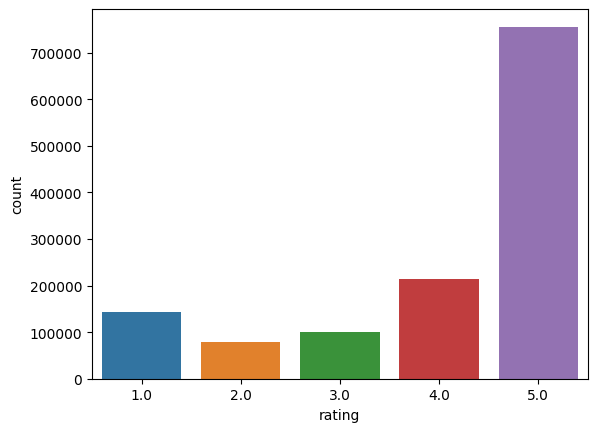

In [67]:
# find the ditributoion of rating 
import seaborn as sn
sn.countplot(x='rating',data=df)
# plt.show()

year
1999       118
2000      3572
2001       702
2002       955
2003      3949
2004      7195
2005     11577
2006     16336
2007     17989
2008     28520
2009     54333
2010     50315
2011     87695
2012    139154
2013    161695
2014    275194
2015    364004
2016     54598
2017     10429
2018      4624
Name: rating, dtype: int64

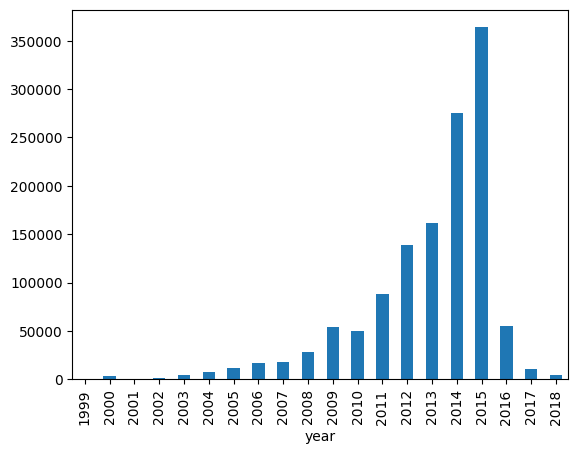

In [91]:
# what is best year of sales
df.columns
df['year'].dtype
df.groupby('year')['rating'].count().plot(kind='bar')
df.groupby('year')['rating'].count()

In [93]:
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [101]:
df.groupby(['year','category'])['rating'].count().sort_values(ascending=False).head(1)

year  category  
2015  Headphones    131097
Name: rating, dtype: int64

<Axes: xlabel='brand'>

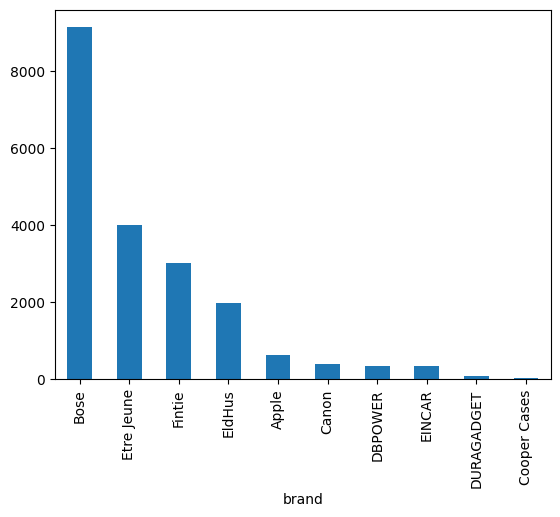

In [112]:
# sold brand in 2015


df1=df[df['year']==2015]
df1.groupby(['brand'])['rating'].count().head(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='brand'>

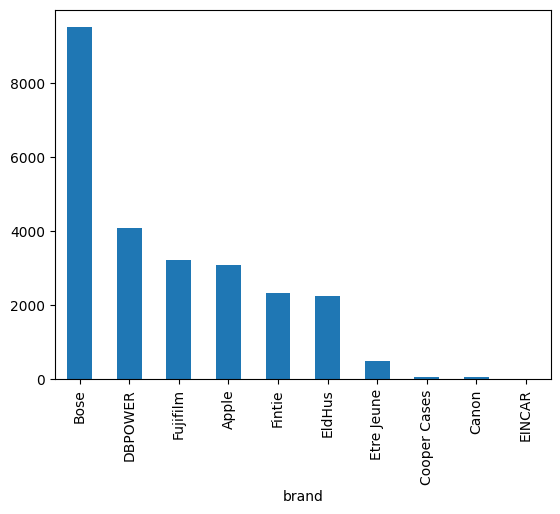

In [114]:
df[df['year']==2014].groupby(['brand'])['rating'].count().head(10).sort_values(ascending=False).plot(kind='bar')

In [116]:
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

<Axes: ylabel='rating'>

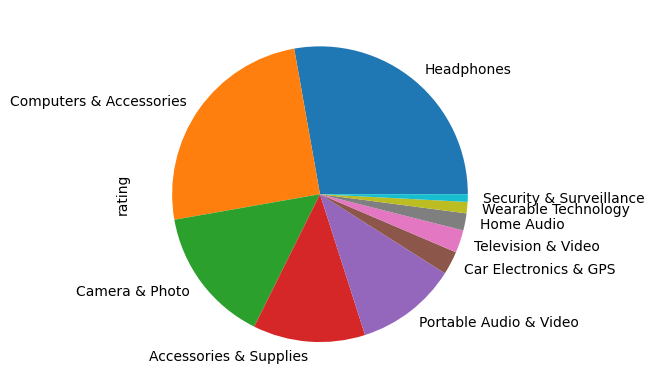

In [118]:
df.groupby('category')['rating'].count().sort_values(ascending=False).plot(kind='pie')